In [ ]:
import subprocess
subprocess.run("make", shell=True)

In [1]:
import subprocess
import re
from functools import partial
from matplotlib import pyplot as plt
timeout = 10
def get_avg_time(obj, n=10, m=100, c=1000, num=30, global_heuristic_flag=-1):
    tot_time = 0
    for i in range(num):
        if(global_heuristic_flag == -1):
            file = open('graph.txt','w')
            subprocess.run(['./create_graph', str(n), str(m), str(c)], stdout = file)
            file.close()
            out = subprocess.check_output(['./' + obj, 'graph.txt'], timeout = timeout)
        else:
            file = open('graph.txt','w')
            subprocess.run(['./create_graph', str(n), str(m), str(c)], stdout = file)
            file.close()
            out = subprocess.check_output(['./' + obj, 'graph.txt', str(global_heuristic_flag)], timeout = timeout)
        out = str(out, 'utf-8')
        time = float(re.split('\n|:',out)[-2])
        tot_time += time
        
    return tot_time / num

flow_names = ["Ford Fulkerson (CPU)", "Edmond Karp (CPU)", "Ford Fulkerson (GPU)", "Edmond Karp (GPU)", 
              "Push Relabel w/o Global relabel (GPU)", "Push Relabel w/ Global relabel (GPU)"]
flow_functions = [
    partial(get_avg_time, "ford_fulkerson_cpu"),
    partial(get_avg_time, "edmond_karp_cpu"),
    partial(get_avg_time, "ford_fulkerson_gpu"),
    partial(get_avg_time, "edmond_karp_gpu"),
    partial(get_avg_time,"push_relabel_gpu",global_heuristic_flag=0),
    partial(get_avg_time,"push_relabel_gpu",global_heuristic_flag=1)
]
flow_colors = ['k','g','b','r','c','m']

In [2]:
# Varying number of edges while keeping number of vertices fixed
def varyE(n):
    print('Number of vertices: {}'.format(n))
    for i in range(6):
        name = flow_names[i]
        foo = flow_functions[i]
        color = flow_colors[i]
        print('Method: {}'.format(name))
        m = 100
        times = [0]
        edges = [0]
        while(m <= 1000000):
            try:
                t = foo(n, m)
                times.append(t)
                edges.append(m)
            except:
                times.append(timeout)
                edges.append(m)
            m *= 2
        plt.plot(edges, times, color, label = name)
    plt.xscale("log")
    plt.title('Time v/s |E|, |V| = {}, Max. Capacity 1000'.format(n))
    plt.xlabel('|E|, number of edges')
    plt.ylabel('Time (in sec)')
    plt.legend()
    plt.savefig('plots/VaryE_{}.png'.format(n))
    plt.show()
    
def varyV(m):
    print('Number of edges: {}'.format(m))
    for i in range(6):
        name = flow_names[i]
        foo = flow_functions[i]
        color = flow_colors[i]
        print('Method: {}'.format(name))
        n = 100
        times = [0]
        vertices = [0]
        while(n <= 1000000):
            try:
                t = foo(n, m)
                times.append(t)
                vertices.append(n)
            except:
                times.append(timeout)
                vertices.append(n)
            n *= 2
        plt.plot(vertices, times, color, label = name)
    plt.xscale("log")
    plt.title('Time v/s |V|, |E| = {}, Max. Capacity 1000'.format(m))
    plt.xlabel('|V|, number of vertices')
    plt.ylabel('Time (in sec)')
    plt.legend()
    plt.savefig('plots/VaryV_{}.png'.format(n))
    plt.show()
    
def varyC(n,m):
    print('Number of vertices:{}, Number of edges: {}'.format(n, m))
    for i in range(6):
        name = flow_names[i]
        foo = flow_functions[i]
        color = flow_colors[i]
        print('Method: {}'.format(name))
        c = 1
        times = [0]
        cap = [0]
        while(c * m <= 1000000000):
            try:
                t = foo(n, m, c)
                times.append(t)
                cap.append(c)
            except:
                times.append(timeout)
                cap.append(c)
            c *= 2
        plt.plot(cap, times, color, label = name)
    plt.xscale("log")
    plt.title('Time v/s Max Capacity, |V| = {}, |E| = {}'.format(n,m))
    plt.xlabel('Max. capacity')
    plt.ylabel('Time (in sec)')
    plt.legend()
    plt.savefig('plots/VaryC_{}_{}.png'.format(n,m))
    plt.show()

Number of vertices:1000, Number of edges: 1000000
Method: Ford Fulkerson (CPU)
Method: Edmond Karp (CPU)
Method: Ford Fulkerson (GPU)
Method: Edmond Karp (GPU)
Method: Push Relabel w/o Global relabel (GPU)
Method: Push Relabel w/ Global relabel (GPU)


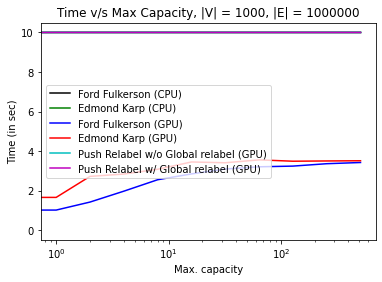

In [3]:
varyC(1000,1000000)